# Lab session 5: Logistic regression
__Name: Makesh Srinivasan<br>
Registration number: 19BCE1717<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 6-September-2021 Monday__

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics

## Read the dataset

#### About the data 

The data was downloaded from UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

My aim in this lab exercise is to predict whether the wine is "White" or "Red" (column = type) based on the other attributes

Reference: https://www.kaggle.com/rajyellow46/wine-quality

In [2]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# White = 1
# Red = 2
data.type.replace(('white','red'), (1,2), inplace=True)

In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Visualisation - Pairplot

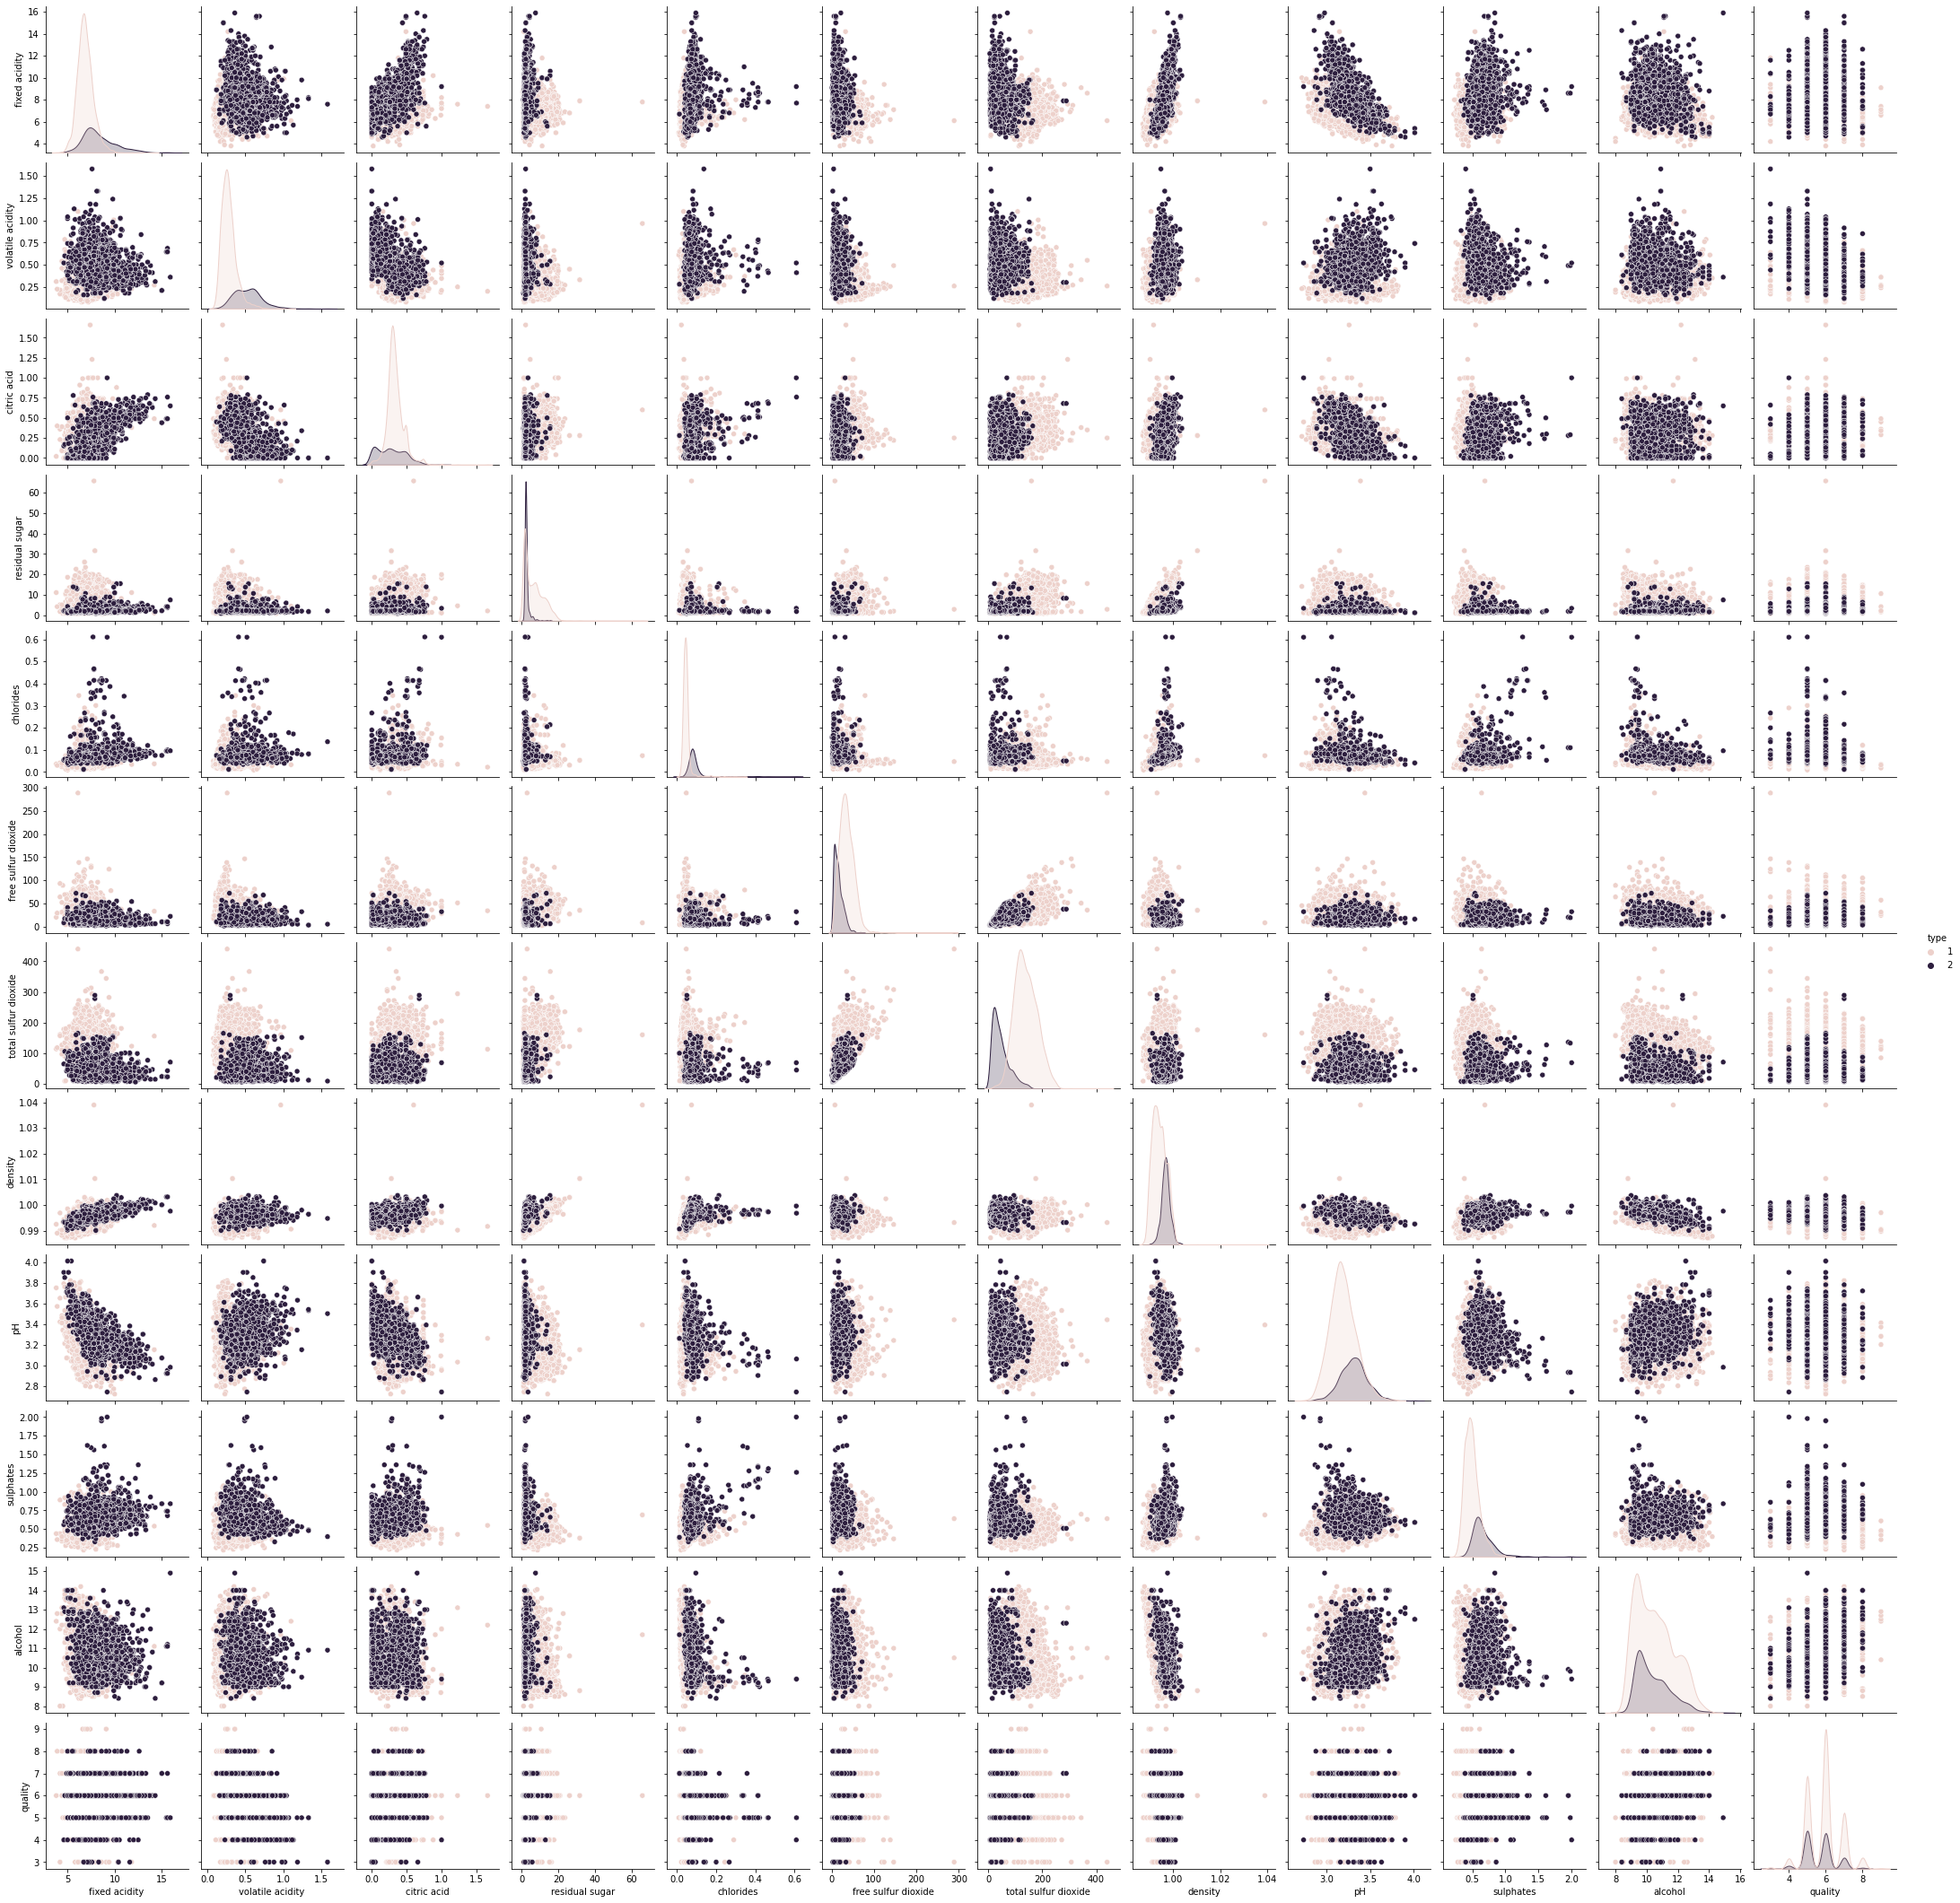

In [7]:
sb.pairplot(data,hue="type")

## Visualisation - Heatplot

<AxesSubplot:>

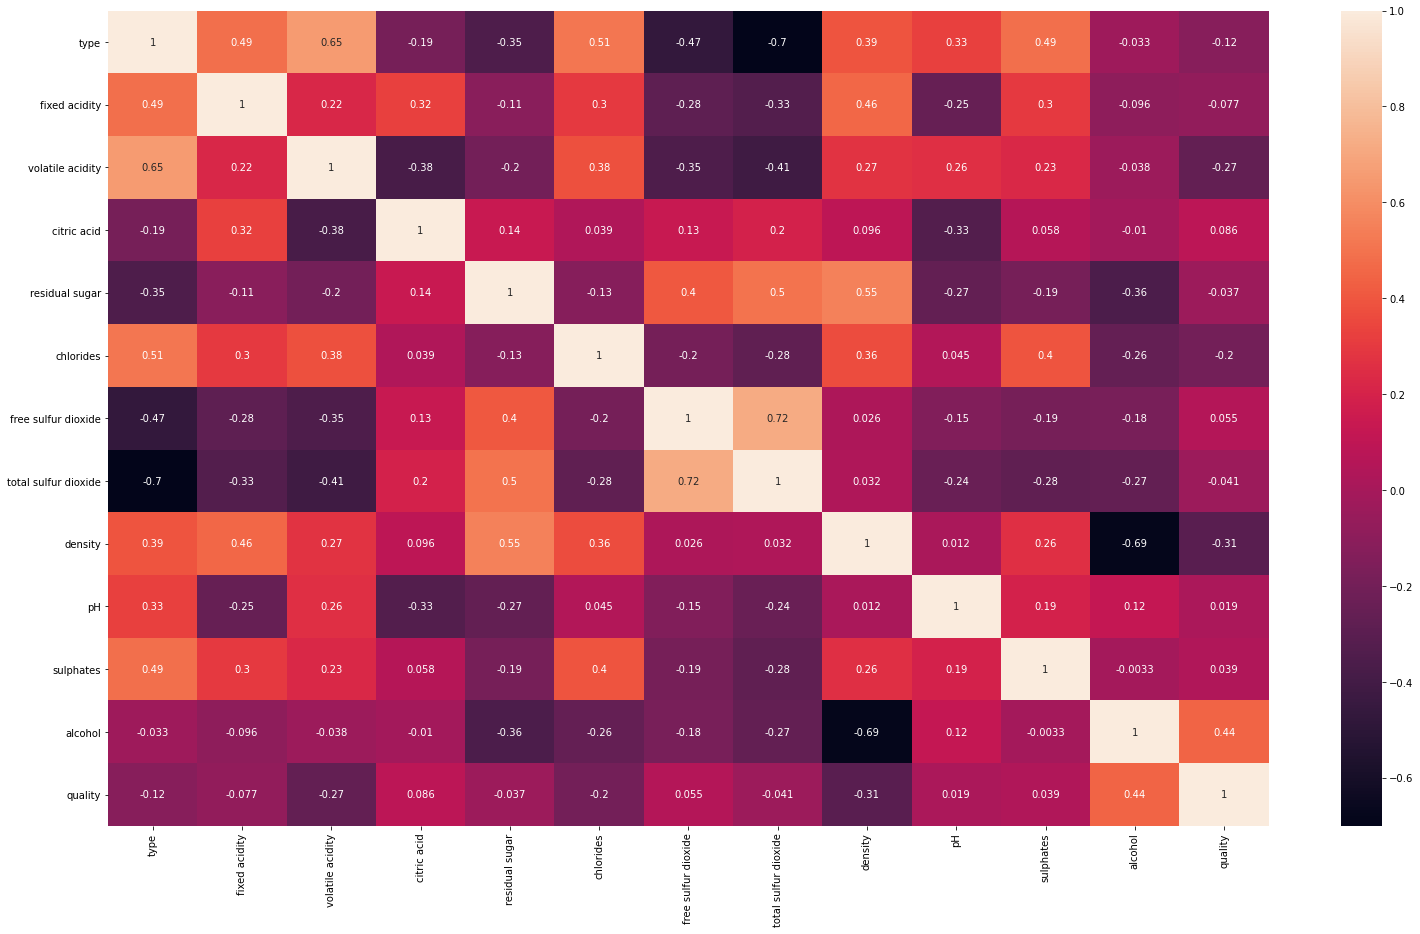

In [5]:
corr=data.corr()
plt.figure(figsize = (26,15))
sb.heatmap(corr, annot=True)

## Missing values

In [6]:
data.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


There are missing values in the dataset, hence not clean. They need to be filled as shown below

In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace=True)
data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace=True)
data['citric acid'].fillna(data['citric acid'].mean(), inplace=True)
data['residual sugar'].fillna(data['residual sugar'].mean(), inplace=True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace=True)
data['pH'].fillna(data['pH'].mean(), inplace=True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace=True)

In [9]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The missing values in the columns are filled by the mean of that respective column. The dataset is clean for training and modelling

## Split target from the dataset

In [10]:
X = data.drop('type',axis=1)
y = data['type']
print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Split train and test data 

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=42)
print("Train size:",len(train_x))
print("Test size:",len(test_x))

Train size: 4547
Test size: 1950


## MinMax Scaler applied

In [13]:
minmax = preprocessing.MinMaxScaler()
train_y1, test_y1 = minmax.fit_transform(train_y.values.reshape(-1,1)),minmax.fit_transform(test_y.values.reshape(-1,1))
train_y1 = train_y1.flatten()
test_y1 = test_y1.flatten()

In [14]:
print(train_y1)

[0. 0. 0. ... 1. 1. 0.]


In [15]:
print(train_x.shape)
print(train_y1.shape)
print(test_x.shape)
print(test_y1.shape)

(4547, 12)
(4547,)
(1950, 12)
(1950,)


## Train Regression Model

In [17]:
clf = linear_model.LogisticRegression()
clf.fit(train_x, train_y1)

/Users/srinivasanperumal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

#### On test data

In [18]:
pred=clf.predict(test_x)
pred

array([0., 0., 0., ..., 1., 0., 1.])

In [19]:
test_y1

array([0., 0., 0., ..., 1., 0., 1.])

In [20]:
# Accuracy
metrics.accuracy_score(test_y1, pred)

0.9712820512820513

In [21]:
# Precision
precision = metrics.precision_score(test_y1, pred)
precision

0.9507494646680942

In [22]:
# Recall
recall = metrics.recall_score(test_y1, pred)
recall

0.9308176100628931

In [23]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y1, pred)
cnf_matrix

array([[1450,   23],
       [  33,  444]])

In [24]:
# F1
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.940677966101695

#### On the entire dataset

In [37]:
X2=data.values[:,1:13]
X2

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [38]:
pred_total = clf.predict(X2)
data['Predicted_type'] = pred_total+1
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Predicted_type
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0


## Evaluation of the model

__Accuracy__


In [39]:
metrics.accuracy_score(data['type'], data['Predicted_type'])

0.9753732491919347

__Precision__

In [40]:
precision = metrics.accuracy_score(data['type'],data['Predicted_type'])
precision

0.9753732491919347

__Recall__

In [33]:
recall = metrics.recall_score(data['type'],data['Predicted_type'])
recall

0.9850959575336872

__Confusion Matrix__

In [34]:
cnf_matrix = metrics.confusion_matrix(data['type'],data['Predicted_type'])
cnf_matrix

array([[4825,   73],
       [  87, 1512]])

Text(0.5, 257.44, 'Predicted label')

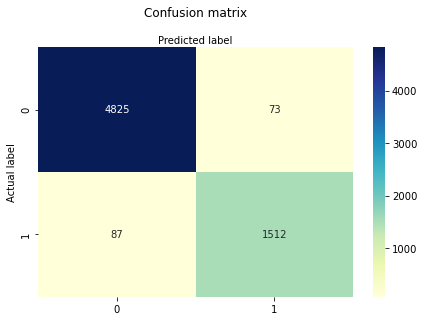

In [35]:
class_names=["White","Red"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

__F1 score__

In [36]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9802104940686751

# Practice using the Admission_Predict.csv file

In [5]:
df = pd.read_csv("Admission_Predict.csv")
print(df.shape)
print(df.info())
print(df.head())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB
None
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.

In [6]:
# how many has got admissions out of 400
print(df[df['Chance of Admit']=='yes'].count())

Serial No.           367
GRE Score            367
TOEFL Score          367
University Rating    367
SOP                  367
LOR                  367
CGPA                 367
Research             367
Chance of Admit      367
dtype: int64


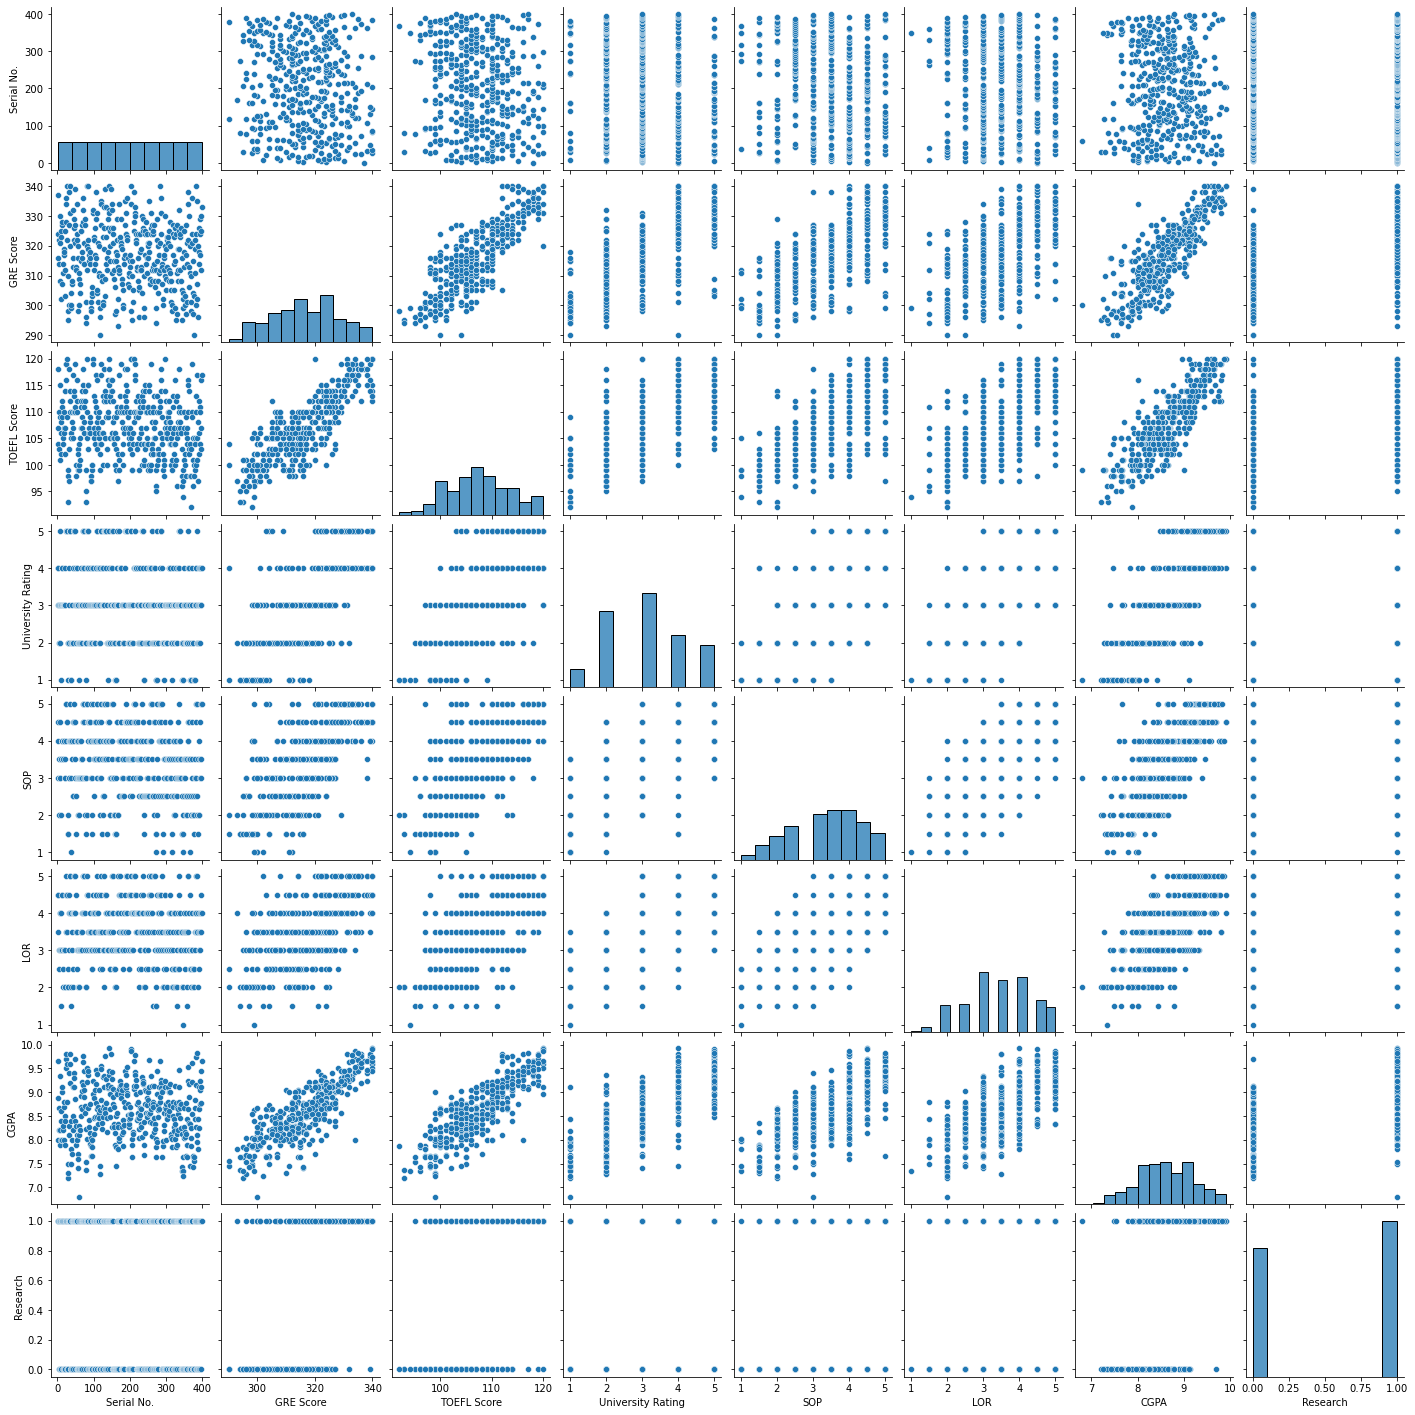

In [7]:
# Lot of linearity exists between the columns so LR is suited
sb.pairplot(df)
plt.show()

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   

                        SOP      LOR       CGPA  Research  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138  
GRE Score          0.612831  0.557555  0.833060  0.580391  
TOEFL Score        0.657981  0.567721  0.828417  0.489858  
University Rating  0.734523  0.660123  0.746479  0.447783  
SOP            

<AxesSubplot:>

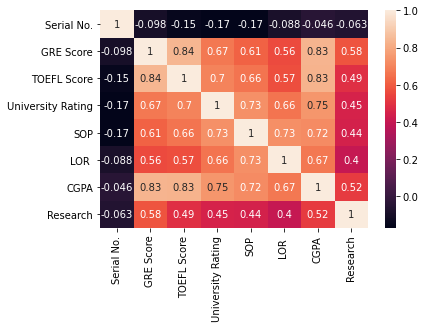

In [8]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [9]:
# Removing the serial no and retaining it
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,yes
1,324,107,4,4.0,4.5,8.87,1,yes
2,316,104,3,3.0,3.5,8.00,1,yes
3,322,110,3,3.5,2.5,8.67,1,yes
4,314,103,2,2.0,3.0,8.21,0,yes


In [10]:
# checking the missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
train_x = (df2[:,0:7])
train_y = df2[:,7]
print(train_x)
print(train_y)

[[337 118 4 ... 4.5 9.65 1]
 [324 107 4 ... 4.5 8.87 1]
 [316 104 3 ... 3.5 8.0 1]
 ...
 [330 116 4 ... 4.5 9.45 1]
 [312 103 3 ... 4.0 8.78 0]
 [333 117 4 ... 4.0 9.66 1]]
['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'y

In [13]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8        0.85714286 0.75       ... 0.875      0.84935897 1.        ]
 [0.44       0.39285714 0.5        ... 0.75       0.63461538 0.        ]
 [0.86       0.89285714 0.75       ... 0.75       0.91666667 1.        ]]


In [14]:
regress.fit (train_x,train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[ 1.84653573  1.95483918  0.24428078 -0.02699547  1.5526433   2.61487109
   0.44589894]]
Intercept:  [-1.47821059]


In [15]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("log_result_1.csv")

yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes